In [ ]:
# downloading dataset
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
    -O /tmp/rockpaperscissors.zip

--2020-05-29 03:33:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  32.9MB/s    in 10s     

2020-05-29 03:33:16 (30.0 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# Data Extraction
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Data Initiation
directory = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
import tensorflow as tf 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augment Pictures Initiation
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.2)

In [ ]:
# Training and Validation Set Initiation
train_gen = datagen.flow_from_directory(
            directory,
            target_size =(150,150),
            class_mode  ='categorical',
            batch_size  = 32,
            subset ='training'
            )

val_gen   = datagen.flow_from_directory(
            directory,
            target_size = (150,150),
            class_mode ='categorical',
            batch_size = 32,
            subset = 'validation'
            ) 

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
# neural network initiation
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# Parameter Initiation
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
training = model.fit(
    train_gen, 
    epochs=15, 
    steps_per_epoch=32,
    validation_data = val_gen, 
    verbose = 1)

Epoch 1/15
32/32 [==============================] - 74s 2s/step - loss: 0.9130 - accuracy: 0.6778 - val_loss: 0.4144 - val_accuracy: 0.8719
Epoch 2/15
32/32 [==============================] - 75s 2s/step - loss: 0.4651 - accuracy: 0.8291 - val_loss: 0.2739 - val_accuracy: 0.9062
Epoch 3/15
32/32 [==============================] - 78s 2s/step - loss: 0.3227 - accuracy: 0.8926 - val_loss: 0.2134 - val_accuracy: 0.9176
Epoch 4/15
32/32 [==============================] - 74s 2s/step - loss: 0.4149 - accuracy: 0.8768 - val_loss: 0.2374 - val_accuracy: 0.9222
Epoch 5/15
32/32 [==============================] - 74s 2s/step - loss: 0.2233 - accuracy: 0.9182 - val_loss: 0.3167 - val_accuracy: 0.8993
Epoch 6/15
32/32 [==============================] - 75s 2s/step - loss: 0.2241 - accuracy: 0.9258 - val_loss: 0.2599 - val_accuracy: 0.9039
Epoch 7/15
32/32 [==============================] - 74s 2s/step - loss: 0.2221 - accuracy: 0.9192 - val_loss: 0.1561 - val_accuracy: 0.9428
Epoch 8/15
32/32 [==

55/55 [==============================] - 37s 668ms/step - loss: 0.0468 - accuracy: 0.9829
Accuracy: 0.9828669428825378


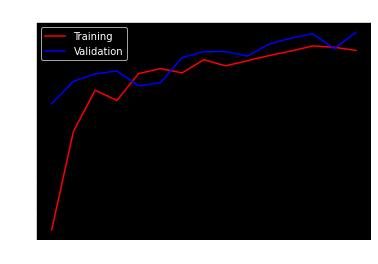

<Figure size 432x288 with 0 Axes>

In [ ]:
# Model Accuracy
import matplotlib.pyplot as plt
acc = training.history['accuracy']
val_acc = training.history['val_accuracy']
loss = training.history['loss']
val_loss = training.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r',label='Training')
plt.plot(epochs, val_acc, 'b',label='Validation')
plt.title('Accuracy')
plt.legend(loc=0)
plt.figure()

test_loss, test_acc = model.evaluate(train_gen, verbose=1)

print('Accuracy:', test_acc)
plt.show()


Saving 85dWwzSo83sQnsoh.png to 85dWwzSo83sQnsoh.png
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
co

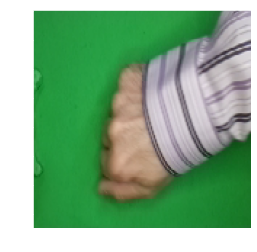

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  model.summary()
  print(classes)
  print(fn)
  if classes [0][0] == 1:
    print('kertas')
  elif classes[0][1] == 1:
    print('batu')
  else:
    print('gunting')

    #[[0. 0. 1.]] = gunting
    #[[0. 1. 0.]] = batu 
    #[[1. 0. 0.]] = kertas
    